In [2]:
%matplotlib inline
from __future__ import division, print_function
from six import StringIO
import xml.etree.ElementTree as etree
import re

import matplotlib.path as path
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import requests
import collections

from svgpath2mpl import parse_path

In [3]:
from IPython.display import Image
Image(url='./just_stripes_2.svg')

In [4]:
tree = etree.parse(open("./just_stripes_2.svg", "r"))
root = tree.getroot()
width = int(re.match(r'\d+', root.attrib['width']).group())
height = int(re.match(r'\d+', root.attrib['height']).group())
path_elems = root.findall('.//{http://www.w3.org/2000/svg}path')

In [5]:
paths = [parse_path(elem.attrib['d']) for elem in path_elems]
facecolors = [elem.attrib.get('fill', 'red') for elem in path_elems]
edgecolors = [elem.attrib.get('stroke', 'black') for elem in path_elems]
linewidths = [elem.attrib.get('stroke-width', 1) for elem in path_elems]
x = np.array([[min(p._vertices[:][0]), max(p._vertices[:][0])] for p in paths])
y = np.array([[min(p._vertices[:][1]), max(p._vertices[:][1])] for p in paths])
minx = np.min(x)
miny = np.min(y)
maxx = np.max(x)
maxy = np.max(y)
for p in paths:
    p._vertices[:,0] -= minx
    p._vertices[:,1] -= miny

In [6]:
import itertools

facecolors = list(itertools.chain(*[[x.split(":")[1] for x in elem.attrib['style'].split(";") if bool(re.match("^fill:.*", x))] for elem in path_elems]))
edgecolors = list(itertools.chain(*[[x.split(":")[1] for x in elem.attrib['style'].split(";") if bool(re.match("^stroke:.*", x))] for elem in path_elems]))
fillopacity = list(itertools.chain(*[[x.split(":")[1] for x in elem.attrib['style'].split(";") if bool(re.match("^fill-opacity:.*", x))] for elem in path_elems]))


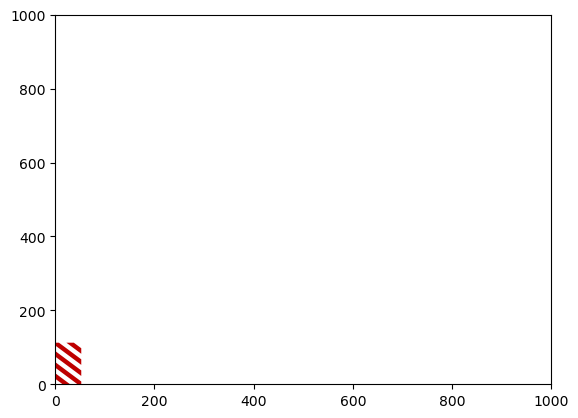

In [7]:
collection = mpl.collections.PathCollection(paths, 
                                      edgecolors=edgecolors, 
                                      linewidths=linewidths,
                                      facecolors=facecolors)
fig, ax = plt.subplots()
plt.xlim(0, 1000)
plt.ylim(0, 1000)

# plt.plot(list(range(10)), list(range(0, 100, 10)))
ax.add_artist(collection)

In [167]:
p._vertices[:,0]

array([ 52.5,  22.5, 112.5, 127.5, 127.5, 127.5])

In [10]:
def svg2mpl(filename, ll_corner, width):
    tree = etree.parse(open(filename, "r"))
    root = tree.getroot()
    path_elems = root.findall('.//{http://www.w3.org/2000/svg}path')
    paths: list[path.Path] = [parse_path(elem.attrib['d']) for elem in path_elems]
    facecolors = [elem.attrib.get('fill', 'red') for elem in path_elems]
    edgecolors = [elem.attrib.get('stroke', 'black') for elem in path_elems]
    linewidths = [elem.attrib.get('stroke-width', 1) for elem in path_elems]
    x = np.array([[min(p._vertices[:][0]), max(p._vertices[:][0])] for p in paths])
    y = np.array([[min(p._vertices[:][1]), max(p._vertices[:][1])] for p in paths])
    minx = np.min(x)
    miny = np.min(y)
    maxx = np.max(x)
    cur_w = maxx - minx
    scale_ratio = width/cur_w
    for p in paths:
        print(p.__dict__)
        p._vertices[:,0] -= minx 
        p._vertices[:,1] -= miny
        p._vertices *= scale_ratio
        p._vertices[:,0] += ll_corner[0]
        p._vertices[:,1] += ll_corner[1]
    facecolors = list(itertools.chain(*[[x.split(":")[1] for x in elem.attrib['style'].split(";") if bool(re.match("^fill:.*", x))] for elem in path_elems]))
    edgecolors = list(itertools.chain(*[[x.split(":")[1] for x in elem.attrib['style'].split(";") if bool(re.match("^stroke:.*", x))] for elem in path_elems]))
    fillopacity = list(itertools.chain(*[[x.split(":")[1] for x in elem.attrib['style'].split(";") if bool(re.match("^fill-opacity:.*", x))] for elem in path_elems]))
    facecolors = [f"{fc}{int(float(fo)*255):x}".upper() for fo, fc in zip(fillopacity, facecolors)]
    collection = mpl.collections.PathCollection(paths, 
                                      edgecolors=edgecolors, 
                                      linewidths=linewidths,
                                      facecolors=facecolors)
    return collection


{'_vertices': array([[ 75.      ,  89.999999],
       [ 89.999999,  75.      ],
       [105.      ,  75.      ],
       [ 75.      , 105.      ],
       [ 75.      ,  89.999999],
       [ 75.      ,  89.999999]]), '_codes': array([ 1,  2,  2,  2,  2, 79], dtype=uint8), '_interpolation_steps': 1, '_simplify_threshold': 0.111111111111, '_should_simplify': False, '_readonly': False}
{'_vertices': array([[120.      ,  75.      ],
       [ 75.      , 120.      ],
       [ 75.      , 135.      ],
       [127.5     ,  82.499998],
       [127.5     ,  75.      ],
       [120.      ,  75.      ],
       [120.      ,  75.      ]]), '_codes': array([ 1,  2,  2,  2,  2,  2, 79], dtype=uint8), '_interpolation_steps': 1, '_simplify_threshold': 0.111111111111, '_should_simplify': False, '_readonly': False}
{'_vertices': array([[ 75. , 150. ],
       [127.5,  97.5],
       [127.5, 112.5],
       [ 75. , 165. ],
       [ 75. , 150. ],
       [ 75. , 150. ]]), '_codes': array([ 1,  2,  2,  2,  2, 79], d

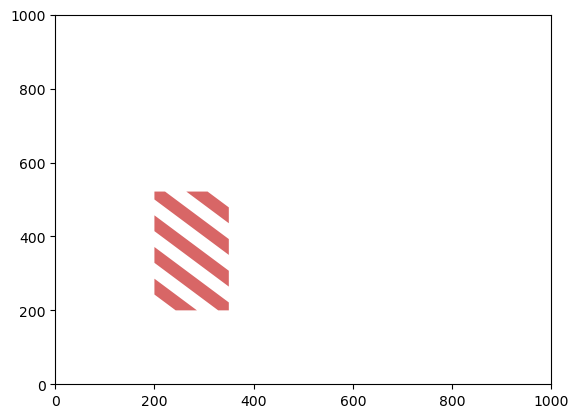

In [11]:
fig, ax = plt.subplots()
plt.xlim(0, 1000)
plt.ylim(0, 1000)
artist = svg2mpl("./just_stripes_2.svg", (200, 200), 300)
ax.add_artist(artist)
